In [14]:
# question A1
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt


data_f = pd.read_csv(r'Purchase data-Table 1.csv')
irctc_data = pd.read_excel(r'/content/Lab Session1 Data.xlsx', sheet_name= "IRCTC Stock Price")
df = pd.DataFrame(data_f)
df.drop(df.iloc[:, 5:23], axis=1, inplace=True)
print(df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [4]:
A_purchase = df.iloc[0:10,1:4]
print(A_purchase)
A=np.array(A_purchase)
print(A)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]


In [15]:
C_total = df.iloc[0:10,4]
C = np.array(C_total)
C = C.reshape(10,1)
print(C)

[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]


In [16]:
# Q1 a To find dimention
print("Dimensionality of given data is", df.shape)

Dimensionality of given data is (10, 5)


In [17]:
#  Q1 b To find how many vectors exist in this vector space.
print("Number of rows are", df.shape[0])


Number of rows are 10


In [18]:
# Q1 c To find the rank
print("The rank of matrix is ", np.linalg.matrix_rank(A_purchase))


The rank of matrix is  3


In [19]:
# Use Pseudo-Inverse.
x = np.linalg.pinv(A)
print(x)

[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [20]:
# Q2 to find cost
y = np.dot(x,C)
print("Cost of a candy is", y[0])
print("COst of a mangoe is", y[1])
print("Cost of a milk packet is", y[2])

Cost of a candy is [1.]
COst of a mangoe is [55.]
Cost of a milk packet is [18.]


In [21]:
# Q3 To categrize customer
dff = df
status_category = []
for r in df['Payment (Rs)']:
  if r < 200 :
    status_category.append('poor')
  elif r >= 200 :
    status_category.append('rich')
dff['category']= status_category
print(dff)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) category
0      C_1           20             6                 2           386     rich
1      C_2           16             3                 6           289     rich
2      C_3           27             6                 2           393     rich
3      C_4           19             1                 2           110     poor
4      C_5           24             4                 2           280     rich
5      C_6           22             1                 5           167     poor
6      C_7           15             4                 2           271     rich
7      C_8           18             4                 2           274     rich
8      C_9           21             1                 4           148     poor
9     C_10           16             2                 4           198     poor


In [22]:
# Q4 a To calculate mean and variance
irctc_df = pd.DataFrame(irctc_data)
print(irctc_df)



             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

In [23]:
# mean and variance
irctc_mean = irctc_df["Price"].mean()
print("Price mean is ", irctc_mean)
irctc_var = irctc_df["Price"].var()
print("Price Variance is ", irctc_var)

Price mean is  1560.6634538152612
Price Variance is  58732.36535253918


In [24]:
# Q4 b
wed_mean = irctc_df.loc[irctc_df['Day'] == 'Wed', 'Price'].mean()
print(wed_mean)
print("sales at IRCTC are less during Wednesdays ")


1550.7060000000001
sales at IRCTC are less during Wednesdays 


In [25]:
# Q4  c
apr_mean = irctc_df.loc[irctc_df['Month'] == 'Apr', 'Price'].mean()
print(apr_mean)
print("sales at IRCTC are higher during the April month")

1698.9526315789474
sales at IRCTC are higher during the April month


In [26]:
# Q4 D
neg = 0
for index,row in irctc_df.iterrows():
    if row['Chg%'] < 0:
        neg+=1
print("probability of getting loss ",neg/irctc_df.shape[0])

probability of getting loss  0.4979919678714859


In [27]:
# Q4 E Calculate the probability of making a profit on Wednesday AND conditional probability of profit on  Wednesday.
wed=0
wed_pos=0



for index,row in irctc_df.iterrows():
    if row['Day']=='Wed':
        if row['Chg%']>0:
            wed_pos+=1
        wed+=1

print("probability of getting profit on Wednesday ",wed_pos/wed)

probability of getting profit on Wednesday  0.42


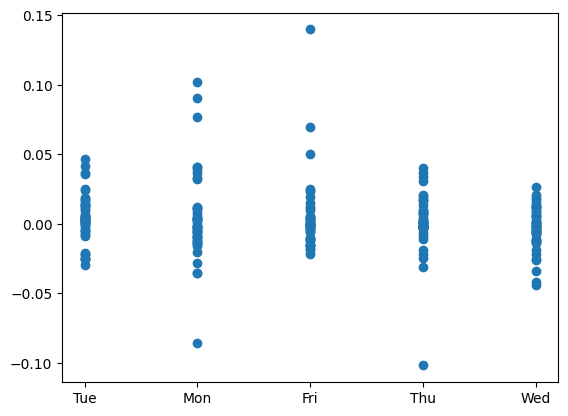

In [28]:
days= []
chg= []
for index,row in irctc_df.iterrows():
    days.append(row['Day'])
    chg.append(row['Chg%'])
plt.scatter(days, chg)
plt.show()